
---

### Unit 1 Project

**Group 9:**

- Erica Drummond
- Madison Meyers
- Jake Miller
- Shrinath Parikh
- Pranati Yadlapalli  

*NEUR 3002 / BMED 4803 - Due 2/13/2024*

---

#### Leaky Integrate-and-Fire Neuron (Q2a)
  
Description:

*The Leaky Integrate-and-Fire model provides a circuit interpretation of the biological neuron. Spikes are not modeled action potentials, but event representations indicating the reaching of membrane threshold. The model assumes an input current which encompasses all of the complex synaptic currents into a single variable. Based on a time constant $\tau=R_L C$, the input can drive the membrane potential to threshold faster or slower. The resistance $R_L$ represents the reciprocal of the leaky conductance provided by ions travelling through membrane pores and channels. The capacitance $C$ represents the accumulation of ions on either side of the cell membrane, which also describes the membrane potential.*


---

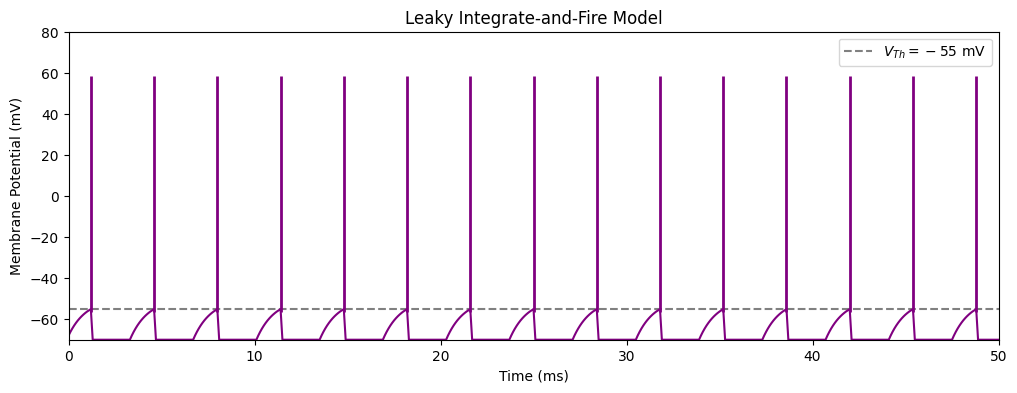

In [121]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, tau_m=10, v_th=-55, v_L=-70, g_L=10, tau_ref=2):
        self.tau_m = tau_m  # membrane time constant
        self.v_th = v_th  # threshold potential
        self.v_L = v_L  # resting/leaky membrane potential
        self.g_L = g_L # leaky membrane conductance
        self.tau_ref = tau_ref  # refractory period
        self.reset()

    def reset(self):
        self.v = self.v_L
        self.refractory_time = 0

    def update(self, dt, current):
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = self.v_L
        else:
            dv = (-self.g_L*(self.v - self.v_L) + current) / self.tau_m * dt
            self.v += dv
            if self.v >= self.v_th:
                self.v = self.v_L
                self.refractory_time = self.tau_ref
                return True  # Spike occurred
        return False

def simulate_lif_neuron(neuron, currents, dt=0.1, duration=100):
    
    num_steps = int(duration / dt)

    voltages = []
    spike_times = []

    for i in range(num_steps):
        current = currents[i] if i < len(currents) else 0
        spike_occurred = neuron.update(dt, current)
        voltages.append(neuron.v)

        if spike_occurred:
            spike_times.append(i * dt)

    time = np.arange(0, duration, dt)
    return time, voltages, spike_times

# Produce Simulation
ampltiude = 200
currents = np.ones(1000)*ampltiude                                                                  # 1000 * dt = 100 ms               

neuron = LIFNeuron()
time, voltages, spike_times = simulate_lif_neuron(neuron, currents)

# Plotting the results
plt.figure(figsize=(12, 4))
plt.axhline(neuron.v_th,color='gray',linestyle='--',label=r'$V_{Th}=-55\text{ mV}$')
plt.plot(time, voltages, color='purple')
plt.eventplot(np.array(spike_times)-0.1, color='purple', linewidths=2, linelengths=115)                # Draw the spikes  
plt.title('Leaky Integrate-and-Fire Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0,50])
plt.ylim([neuron.v_L, 80])
plt.legend()
plt.show()

#### Updated Leaky Integrate-and-Fire Neuron (Q2b)

Description:

*This updated Leaky Integrate-and-Fire model takes into account Voltage-Gated Sodium Channels $(\text{Na}_V)$ to better model relevant potentials in spiking. The $\text{Na}_V$ channels located in the Axon Initial Segment are responsible for generating action potentials in the neuron to propagate down the axon. Our prior LIF model could merely detect if a spike should occur, but did not generate them itself. By considering the gating behavior of gated sodium channels, we can create the spike. We achieve this by assuming the channels "turn on" at threshold and set a sodium current to activate and drive the potential to sodium's equilibrium potential. This creates more realistic and complex spikes than the standard model.*

---

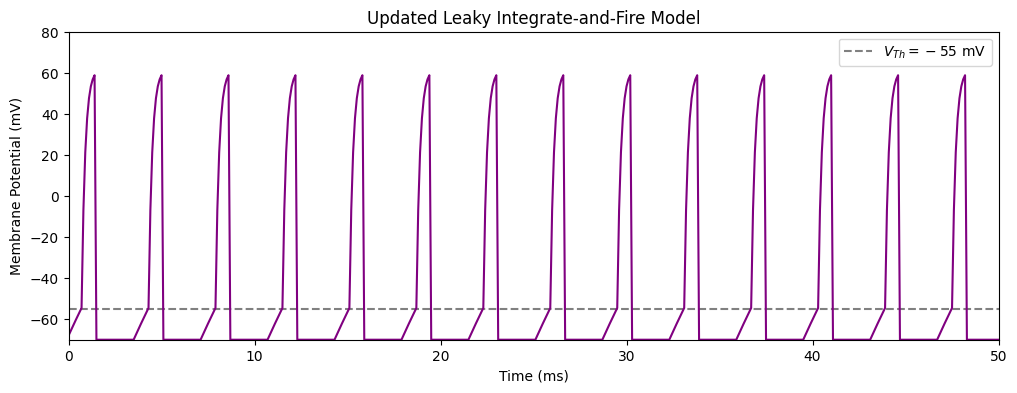

In [122]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, v_th=-55, C=10, v_L=-70, g_L=1, 
                       v_Na=60, g_Na=40, tau_ref=2):
        self.C = C # membrane capacitance
        self.v_th = v_th  # threshold potential
        self.v_L = v_L  # resting/leaky membrane potential
        self.g_L = g_L # leaky membrane conductance
        self.v_Na = v_Na  # sodium equilibrium potential
        self.g_Na = g_Na # sodium membrane conductance
        self.tau_ref = tau_ref  # refractory period
        self.reset()

    def reset(self):
        self.v = self.v_L
        self.refractory_time = 0

    def update(self, dt, current):
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = self.v_L
        else:
            if self.v < self.v_th:
                dv = (-self.g_L*(self.v-self.v_L) + current) / self.C * dt
            else: # Add sodium current once reaching threshold
                dv = (-self.g_L*(self.v-self.v_L)-self.g_Na*(self.v-self.v_Na) + current) / self.C * dt
            self.v += dv
            if self.v >= self.v_Na or dv < 0.05: # Reset action potential if at sodium potential or V infinity
                self.v = self.v_L
                self.refractory_time = self.tau_ref

def simulate_lif_neuron(neuron, currents, dt=0.1, duration=100):
    
    num_steps = int(duration / dt)

    voltages = []

    for i in range(num_steps):
        current = currents[i] if i < len(currents) else 0
        neuron.update(dt, current)
        voltages.append(neuron.v)

    time = np.arange(0, duration, dt)
    return time, voltages

# Produce Simulation
ampltiude = 200
currents = np.ones(1000)*ampltiude                                                                  # 1000 * dt = 100 ms               

neuron = LIFNeuron()
time, voltages = simulate_lif_neuron(neuron, currents)

# Plotting the results
plt.figure(figsize=(12, 4))
plt.axhline(neuron.v_th,color='gray',linestyle='--',label=r'$V_{Th}=-55\text{ mV}$')
plt.plot(time, voltages, color='purple')
plt.title('Updated Leaky Integrate-and-Fire Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0,50])
plt.ylim([neuron.v_L, 80])
plt.legend()
plt.show()

#### Spiking Neural Network (Q2c)

Description:

*A Spiking Neural Network (SNN) takes advantage of the complexity of neural networks to produce sophisticated spiking models of multiple neurons. An Artificial Neural Network (ANN) can also be used to replicate complex dynamics of a single neuron, but more commonly they are employed to see how groups, microcircuits, and populations of neurons spike. This one has an underlying model analogous to the LIF for the individual neuron, but adds multiple neurons as well as the complexity of how they connect with different types of synapses. The Brian2 simulator can create the SNN with synapses describing weights, neurons represented by nodes, and spiking as an output. In particular, our model represents a series of three neurons which have positive weights between them that increasing firing rate.*

---

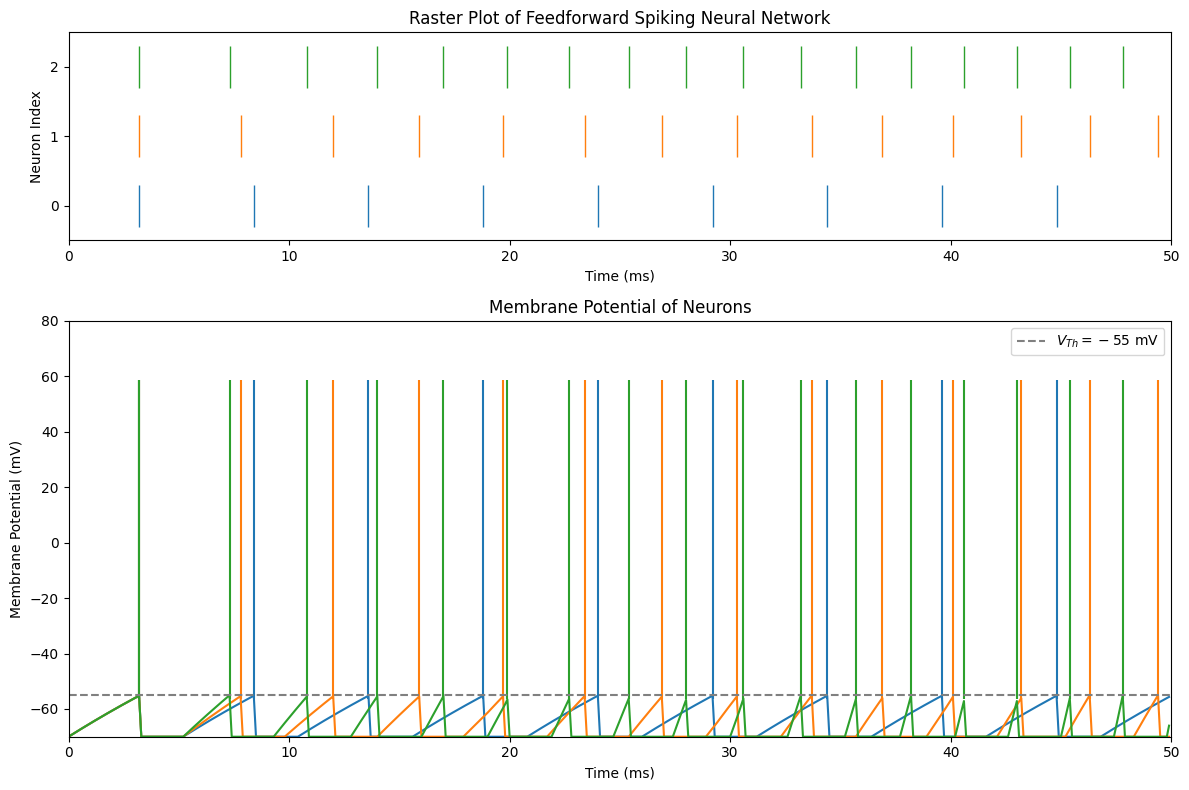

In [123]:
from brian2 import *

# Set up the network parameters
num_neurons = 3
sim_duration = 50 * ms
threshold = -55 * mV  # Threshold for spike generation
reset_value = -70 * mV  # Reset value for membrane potential
tau_membrane = 20 * ms  # Membrane time constant

# Define the model equations for neurons
neuron_eqs = '''
dv/dt = (-(v - v_rest) + I_syn) / tau_membrane : volt (unless refractory)
I_syn : volt
'''

# Define network parameters
v_rest = -70 * mV  # Resting membrane potential

# Create the neuron group
neurons = NeuronGroup(num_neurons, model=neuron_eqs, threshold='v > threshold', reset='v = reset_value', refractory=2 * ms)

# Set initial conditions
neurons.v = v_rest
neurons.I_syn = 100 * mV

# Create synapses connecting neurons in a line with different weights
synapses = Synapses(neurons, neurons, 'w : volt (constant)', on_pre='I_syn_post += w')
synapses.connect(j='i+1',skip_if_invalid=True)  # Connect neurons in a line, skipping self-connections
synapses.w = [0.02*1000, 0.05*1000] * mV  # Different positive synaptic weights

# Set up a monitor to record spikes and membrane potential
spike_monitor = SpikeMonitor(neurons)
state_monitor = StateMonitor(neurons, 'v', record=True)

# Run the simulation
net = Network(neurons, synapses, spike_monitor, state_monitor)
net.run(sim_duration)

fig, axs = subplots(2,1,height_ratios=[1, 2],figsize=(12,8))

# Plot raster plot
for i in range(num_neurons):
    axs[0].plot(spike_monitor.t[spike_monitor.i == i]/ms, [i] * len(spike_monitor.t[spike_monitor.i == i]),
                 '|', markersize=30, label=f'Neuron {i}')
axs[0].set_xlim([0,50])
axs[0].set_ylim([-0.5,2.5])
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Neuron Index')
axs[0].set_yticks([0,1,2])
axs[0].set_title('Raster Plot of Feedforward Spiking Neural Network')

# Plot membrane potential of output neurons
for i in range(num_neurons):
    axs[1].plot(state_monitor.t/ms, state_monitor.v[i]/mV)
for i in range(num_neurons):
    if i==0:
        axs[1].eventplot(spike_monitor.t[spike_monitor.i == i]/ms,color='tab:blue',linelengths=115)
    if i==1:
        axs[1].eventplot(spike_monitor.t[spike_monitor.i == i]/ms,color='tab:orange',linelengths=115)
    if i==2:
        axs[1].eventplot(spike_monitor.t[spike_monitor.i == i]/ms,color='tab:green',linelengths=115)
axs[1].axhline(threshold/mV,ls='--',c='gray',label=r'$V_{Th}=-55\text{ mV}$')
axs[1].set_xlim([0,50])
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Membrane Potential (mV)')
axs[1].set_title('Membrane Potential of Neurons')
axs[1].legend(loc='upper right')
axs[1].set_ylim([reset_value/mV, 80])
tight_layout()
show()

#### Evaluation of Spiking Models (Q3) 

---

**Comparison:**

The first model shown above is a LIF (Leaky Integrate and Fire) model neuron. In this model, it is shown that when an input reaches a certain threshold, in this case about -55 mV, the neuron “fires” and generates an action potential. The presence of an action potential can be determined by the spike that is shown on the model. After each action potential, the membrane potential is set back to its original state until another input reaches the threshold. Although this first model does show action potentials through spikes, it has limitations as it is not the best example because it does not consider certain parts: does not show depolarization/ repolarization phases, and just shows one current input rather than many temporally or spatially summed inputs, or plasticity. The benefit of this model is that it is easy to understand and comprehend at a very simple level. 

The second model shown above is a LIF with sodium channels. This model is similar to the Hodgkin-Huxley Model as they both incorporate sodium channels. This method is quite similar to the previous model as they both have relatively the same visualizations. The main difference is that now with the addition of the voltage-gated sodium channels, depolarization can be shown more clearly. It is under the assumption that the main voltage-gated sodium channels that were added occurred in the Axon Initial Segment; these channels are specialized since they easily generate spikes (something that the first LIF model was not able to do) when the input reaches a threshold. Overall, the benefit of this second model is that it is able to produce a model that is more similar to a biological neuron than the first model by simulating depolarization. A limitation of this model is that it does not represent temporal or spatial summations as it shows that each action potential is from a singular input; this is not the case in reality. 

The third model is an SNN, which is also known as a Spiking Neural network. SNNs are a type of ANNs (artificial neural network) that generate spikes over time steps. This method is the most complex amongst all the other models as this considers multiple neurons rather than input from one and in this case, it is taking 3 neurons into its visualizations. Our visualizations of the SNN are similar to the previous two as one of the three neurons is inspired by the LIF model. However, it differs from the rest as it includes multiple neurons; these neurons have varying firing rates thus allowing them to generate action potentials at various times, creating a unique raster plot and visualizations. A limitation of the SNN model is that it is significantly more complex and more difficult to comprehend compared to the other two models. The main benefit of the SNN model is that it is the most similar to a biological neuron out of all three models since it can consider multiple neural inputs and temporal summation, thus creating a more representative spiking pattern.  

**Information Theory:**

Information theory is the field that ventures into many information is stored and communicated. The information within the code for the LIF model is basic neural inputs, for the LIF model with voltage-gated sodium channels is neural inputs with consideration of depolarization activity, and SNN with neural inputs from multiple neurons along with temporal summation/ other biological systems in consideration. Overall, the information contained increases as we go from the first model to the third model, thus allowing the third model to be the most similar to a biological neuron. We think that the model with the most bits is the SNN; this is because the SNN considers multiple factors. Bits are the measurement that predicts uncertainty. Out of the three models, the SNN has the greatest amount of uncertainty since there are multiple factors to be considered as many neurons are involved, unlike the other two models. The order of greatest to least complex between the three models is SNN, LIF with voltage-gated sodium channels, and LIF model. The LIF with voltage-gated sodium channels is more complex than just the LIF because adding sodium channels is similar to adding NMDAr to an ANN. Since NDMA is a coincidence detector and has a magnesium block, it requires multiple steps to activate it, thus adding NMDAr causes more complexity, SImilarly, adding voltage-gated sodium channels causes the LIF model to be more complex as it is more specific and requires more steps to produce spikes than just the LIF model. The SNN is more complex than LIF with voltage-gated sodium channels because it involves layers of multiple neurons rather than just one neuron and includes temporal summation rather than singular neural inputs. Overall, the SNN is the most complex, thus allowing it to be the most similar out of the three models.

---

#### Input Comparison (Q4)

---

If the inputs differed to where there were not enough inputs to sum to reach the threshold, this means that the number of action potentials would decrease or there may even be no action potentials at all due to the inputs not summing to threshold (and factoring in temporal summation). An example of this can be seen by the below graph. It can be seen that there is not enough summation to reach threshold, so no action potentials are being fired (and because of temporal summation, there is no AP at all due to low continuous input). 

Another example of differing inputs would be if the inputs had increasing current as the input (which would happen in real-life situations where there is an increased response to the stimulus), and this could mean that there would be an increase in the firing rate. This is because the increased response would cause the neuron to depolarize more effectively and would increase the chances of the neuron reaching the threshold. The threshold would also be reached more quickly, which would lead to an increased rate of firing. This pattern can be seen in the image below, where the rate of firing increases.

---

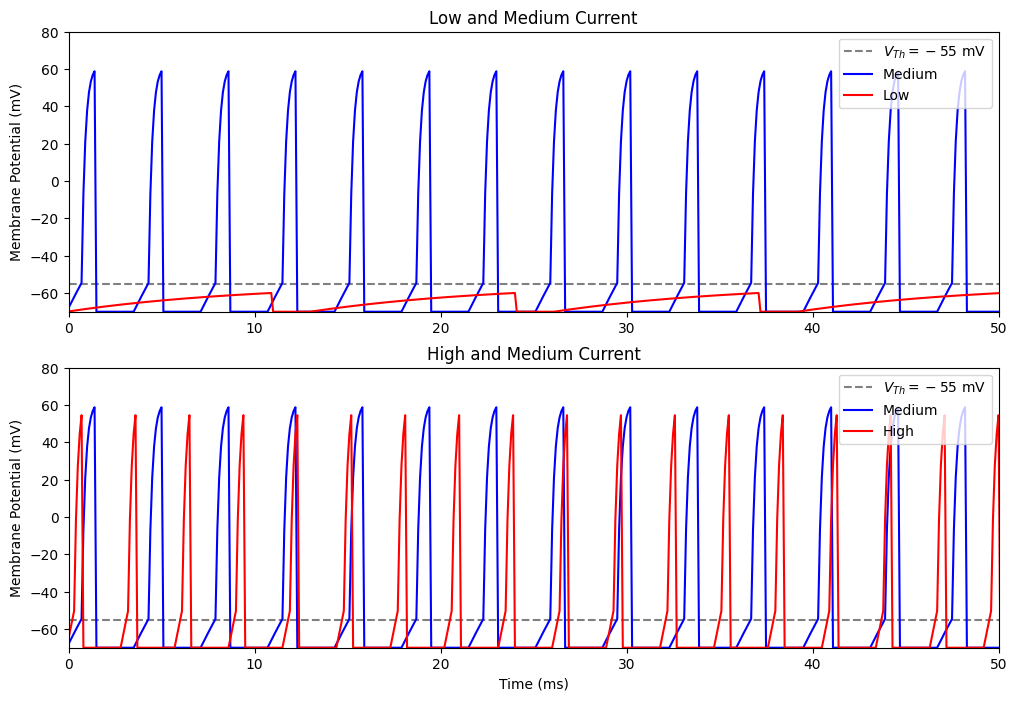

In [156]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, v_th=-55, C=10, v_L=-70, g_L=1, 
                       v_Na=60, g_Na=40, tau_ref=2):
        self.C = C  # membrane capacitance
        self.v_th = v_th  # threshold potential
        self.v_L = v_L  # resting/leaky membrane potential
        self.g_L = g_L  # leaky membrane conductance
        self.v_Na = v_Na  # sodium equilibrium potential
        self.g_Na = g_Na  # sodium membrane conductance
        self.tau_ref = tau_ref  # refractory period
        self.reset()

    def reset(self):
        self.v = self.v_L
        self.refractory_time = 0

    def update(self, dt, current):
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = self.v_L
        else:
            if self.v < self.v_th:
                dv = (-self.g_L*(self.v-self.v_L) + current) / self.C * dt
            else:  # Add sodium current once reaching threshold
                dv = (-self.g_L*(self.v-self.v_L)-self.g_Na*(self.v-self.v_Na) + current) / self.C * dt
            self.v += dv
            if self.v >= self.v_Na or dv < 0.05:  # Reset action potential if at sodium potential or V infinity
                self.v = self.v_L
                self.refractory_time = self.tau_ref

def simulate_lif_neuron(neuron, currents, dt=0.1, duration=100):
    num_steps = int(duration / dt)
    voltages = []

    for i in range(num_steps):
        current = currents[i] if i < len(currents) else 0
        neuron.update(dt, current)
        voltages.append(neuron.v)

    time = np.arange(0, duration, dt)
    return time, voltages

# Produce Simulation
currents1 = np.ones(1000) * 200
currents2 = np.ones(1000) * 15  # Lower current amplitude
currents3 = np.ones(1000) * 500 # Higher current amplitude

neuron1 = LIFNeuron()
time1, voltages1 = simulate_lif_neuron(neuron1, currents1)

neuron2 = LIFNeuron()
time2, voltages2 = simulate_lif_neuron(neuron2, currents2)

neuron3 = LIFNeuron()
time3, voltages3 = simulate_lif_neuron(neuron3, currents3)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.axhline(neuron1.v_th, color='gray', linestyle='--', label=r'$V_{Th}=-55\text{ mV}$')
plt.plot(time1, voltages1, color='blue',label='Medium')
plt.plot(time2, voltages2, color='red',label='Low')
plt.title('Low and Medium Current')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0, 50])
plt.ylim([neuron1.v_L, 80])
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.axhline(neuron1.v_th, color='gray', linestyle='--', label=r'$V_{Th}=-55\text{ mV}$')
plt.plot(time1, voltages1, color='blue',label='Medium')
plt.plot(time3, voltages3, color='red',label='High')
plt.title('High and Medium Current')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0, 50])
plt.ylim([neuron1.v_L, 80])
plt.legend(loc='upper right')
plt.show()

#### Inhibitory Inputs (Q5)

---

In the below model, we were able to add in inhibitory inputs by creating excitatory and inhibitory current variables and combining these to create the total current variable. The model shows one neuron with only excitatory currents, which fires more frequently than the second neuron. This second neuron has the excitatory and inhibitory variables, where the inibitory causes the neuron to fire less frequently because it is more difficult to reach the threshold. Excititory neurotransmitters such as epinephrine cause an increase in current by increasing the firing of the neuron through making the cell more positive. An example of this is in a fight or flight response, epinephrine is released to excite the neurons and prepare for a response such as running away by raising the heart rate. Inhibitory neurotransmittors such as GABA prevent the neuron from firing by making the inside of the neuron more negative and depolarizing the cell. An example of this is with serotonin release to regulate things such as sleep, meaning the neurons are relaxed and fire less. The action potentials also got wider due to the less net current due to inhibition.

---

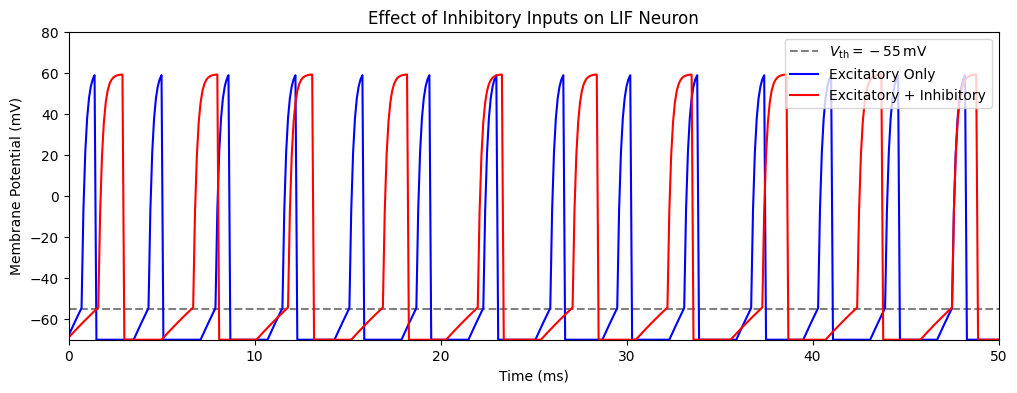

In [157]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, v_th=-55, C=10, v_L=-70, g_L=1, 
                       v_Na=60, g_Na=40, tau_ref=2):
        self.C = C # membrane capacitance
        self.v_th = v_th  # threshold potential
        self.v_L = v_L  # resting/leaky membrane potential
        self.g_L = g_L # leaky membrane conductance
        self.v_Na = v_Na  # sodium equilibrium potential
        self.g_Na = g_Na # sodium membrane conductance
        self.tau_ref = tau_ref  # refractory period
        self.reset()

    def reset(self):
        self.v = self.v_L
        self.refractory_time = 0

    def update(self, dt, current):
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = self.v_L
        else:
            if self.v < self.v_th:
                dv = (-self.g_L*(self.v-self.v_L) + current) / self.C * dt
            else: # Add sodium current once reaching threshold
                dv = (-self.g_L*(self.v-self.v_L)-self.g_Na*(self.v-self.v_Na) + current) / self.C * dt
            self.v += dv
            if self.v >= self.v_Na or dv < 0.05: # Reset action potential if at sodium potential or V infinity
                self.v = self.v_L
                self.refractory_time = self.tau_ref

def simulate_lif_neuron(neuron, currents, dt=0.1, duration=100):
    
    num_steps = int(duration / dt)

    voltages = []

    for i in range(num_steps):
        current = currents[i] if i < len(currents) else 0
        neuron.update(dt, current)
        voltages.append(neuron.v)

    time = np.arange(0, duration, dt)
    return time, voltages


# Simulation parameters
duration = 100  # Total duration of the simulation in ms
dt = 0.1  # Time step in ms

# Excitatory current
current_excitatory = np.ones(int(duration / dt)) * 200  # Excitatory current amplitude

# Inhibitory current
current_inhibitory = np.ones(int(duration / dt)) * -100  # Inhibitory current amplitude

# Excitatory only simulation
neuron_excitatory_only = LIFNeuron()
times, voltages_excitatory_only = simulate_lif_neuron(neuron_excitatory_only, current_excitatory, dt, duration)

# Combined excitatory and inhibitory simulation
total_current_combined = current_excitatory + current_inhibitory
neuron_combined = LIFNeuron()
times, voltages_combined = simulate_lif_neuron(neuron_combined, total_current_combined, dt, duration)

# Plotting the results
plt.figure(figsize=(12, 4))
plt.axhline(neuron_excitatory_only.v_th, color='gray', linestyle='--', label=r'$V_{\mathrm{th}} = -55\,\mathrm{mV}$')
plt.plot(times, voltages_excitatory_only, color='blue', label='Excitatory Only')
plt.plot(times, voltages_combined, color='red', label='Excitatory + Inhibitory')
plt.title('Effect of Inhibitory Inputs on LIF Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim([0,50])
plt.ylim([neuron.v_L, 80])
plt.legend(loc='upper right')
plt.show()

#### Topic Discussion (Q6)

*Artificial Intelligence*

---

##### ***Artificial Intelligence (AI)***
* Definition:
    * Computer system that performs tasks that a human would normally complete. The system is programmed to learn and think as a human would. 
* Overview: 
    * broad range of applications and technology that is targeted to create intelligent tasks as a human can perceive their surroundings, use reasoning, and perform actions to achieve a specific task. 
    * operates via models and algorithms that can process its surroundings/data, recognize patterns, & execute decisions. 
    * Various subtypes of AI; Machine Learning (ML), Artificial Neural Networks (ANN), Deep Neural Networks (DNN), & Natural Language Processing (NLP)
* Examples: 
    * virtual assistants: Siri, Amazon Alexa
    * recommendations: Spotify, Hulu, & Netflix
    * automated vehicles: Tesla, AI-assisted driving apps 
    * Cats: an algorithm can be trained to identify a cat by breed, color, and unique patterns 
![image](https://blogs.worldbank.org/sites/default/files/styles/full_width/public/2023-11/dalle_2023-11-13_12.21.26_-_an_abstract_conceptual_panoramic_graphic_for_a_blog_post_about_misconceptions_of_artificial_intelligence_extending_the_previous_scene_horizontally._t.jpg?itok=Q3t1X-0I)
 (Demombynes 2023)


##### **Machine Learning (ML)**
* Definition: 
    * a type of AI that uses algorithms & models to improve task performance and analyze data. A key distinction of ML is that the system does not need to be explicitly programmed to perform the task and draw inferences based on the data. 
* Overview: 
    * driven by the concept that systems can learn patterns from data automatically without any human intervention.
* Steps:
    * Get data →  manage/sort/prepare data → train → test → improve 
![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAgmrr-SeAI3ss0DMbImy4XzqO8anY2Nk1NjWVUstDQQ&s)
* Types:
    * **Supervised Learning**: training a model based on labeled data and the algorithm learns how to map the input features to then generate outputs.
        *   Regression & Classification
    *  **Unsupervised Learning**: training a model based on unlabeled data in attempts to identify patterns and structures. 
        * Clustering & dimensionality reduction
    * **Reinforcement Learning**: training via a sequence of decisions by interacting with its environment	
        * Game-like system with wins & losses; enabling system to learn from trial and error
* Examples:
    * speech recognition
    * Electronic Health Record (EHR) systems
    * fraud detection
    * Cats: ML can predict a cats behavior based on historical data 
        * Training step of ML; can be reproduced in training a cat
(Original group member in training - Leo 2024)


##### **Artificial Neural Networks (ANN)**
* Definition:
    * computational model inspired by biological neurons that have interconnected nodes/neurons that are organized in layers
    * designed to process information, recognize patterns, and make decisions from learning from examples.
* Overview:
    * Unlike ML and does not need to pre-define any features for the system to use 
    * Interconnected nodes act as the neurons in the human brain 
* Examples 
    * Stock market analysis & predictions
    * Realistic and dynamic nature of video games
    * Cats: ANN can mimic a cat’s brain to some extent; ANN can input data nodes to make classifications like a cat would process the smell of tasty tuna. 
![image](https://cdn.mos.cms.futurecdn.net/avQoSGU9uTjFCgtCW3Rrhk-1280-80.jpg.webp)
 (Woodley 2020)


##### **Deep Neural Networks (DNN)**
* Definition:
    * extension of DNN, has many more hidden layers than an ANN
* Overview: 
    *   characterized by their extensive depth which lets the system automatically extract features from data and make complex decision
* Examples
    * Big data & data mining
    * sports betting & analysis
    * Cats: DNN can be trained to differentiate between different types of meows, chirps, and purrs
![image](https://www.investopedia.com/thmb/HxtgFOai9bAgA7uCQEQn8mVbo6U=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/data-mining-49e2707e28c647ae95ada2852bfff11d.jpg)
 (Twin 2023)


##### **Natural Language Processing (NLP)**
* Definition: 
    * subset of AI that focuses on the interactions of human language and computers. 
    * incorporates the development of algorithms and models that enable computers to recognize, comprehend, and interpret human language. 
* Overview: 
    * Broad range of capabilities
    * Basic language understanding to advanced language generation
    * NLP utilizes DNNs to improve performance
* Examples:
    * User sentiment analysis
    * Virtual assistants
    * Translation systems: Google Translate
    * Cats: interpret different tones of meows as a form of language. 
![image](https://www.gizchina.com/wp-content/uploads/images/2022/08/Google-Translate-1080x608.jpg)
 (Nyame 2022)




**References**

Nyame, F., Shanto, A. A., Fabian, M., Papanikolopoulos, N., Abdullah, & Udin, E. (2022, August 29). *How to effectively use Google Translate*. Gizchina.com. https://www.gizchina.com/2022/08/29/how-to-effectively-use-google-translate  

Twin, A. (2023, April 15). *What is data mining? how it works, benefits, techniques, and example*s. Investopedia. https://www.investopedia.com/terms/d/datamining.asp  

Worldbank. (2023, November 13). *Misconceptions about artificial intelligence and what it means for people*. World Bank Blogs. https://blogs.worldbank.org/investinpeople/misconceptions-about-artificial-intelligence-and-what-it-means-people  

Woodley, K. (2020, November 2). *Stock market Today: Markets climb on election cycle’s Penultimate Day*. Kiplinger.com. https://www.kiplinger.com/investing/stocks/601669/stock-market-today-110220-markets-climb-election-cycle-penultimate-day

#### Bonus (Q7)

***MATPLOTLIB CATS!!!***

---

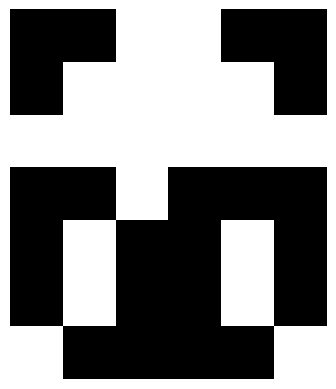

In [126]:
# ChatGPT Cat 1 (Pixel Cat)

import matplotlib.pyplot as plt
import numpy as np

def draw_cat():
    # Define the pixel art for the cat
    cat_pixels = [
        [0, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1],
    ]

    # Create a NumPy array from the pixel data
    cat_array = np.array(cat_pixels)

    # Display the pixel art using Matplotlib
    plt.imshow(cat_array, cmap='gray', interpolation='nearest')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Call the function to draw the cat pixel art
draw_cat()

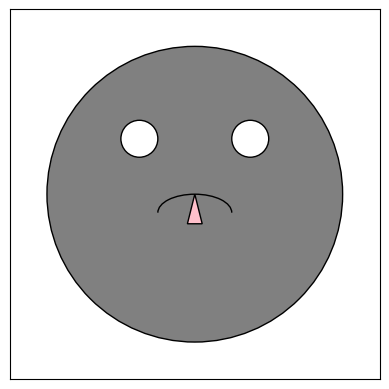

In [127]:
# ChatGPT Cat 2 (Horrifying)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def generate_cat_image():
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw the cat's head
    head = patches.Circle((0.5, 0.5), radius=0.4, facecolor='gray', edgecolor='black')
    ax.add_patch(head)

    # Draw the eyes
    left_eye = patches.Circle((0.35, 0.65), radius=0.05, facecolor='white', edgecolor='black')
    right_eye = patches.Circle((0.65, 0.65), radius=0.05, facecolor='white', edgecolor='black')
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    # Draw the nose
    nose = patches.Polygon([[0.5, 0.5], [0.48, 0.42], [0.52, 0.42]], closed=True, facecolor='pink', edgecolor='black')
    ax.add_patch(nose)

    # Draw the mouth
    mouth = patches.Arc((0.5, 0.45), width=0.2, height=0.1, theta1=0, theta2=180, facecolor='none', edgecolor='black')
    ax.add_patch(mouth)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the cat image
    plt.show()

# Call the function to generate and display the cat image
generate_cat_image()

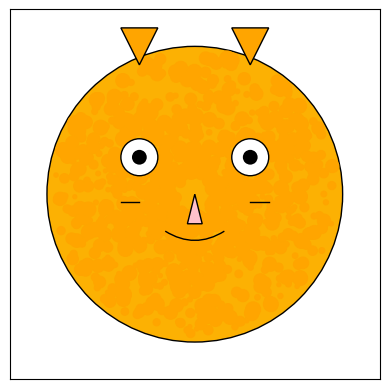

In [134]:
# ChatGPT Cat 3 (Orange Cat)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import numpy as np

def generate_detailed_orange_cat():
    fig, ax = plt.subplots()

    # Draw the cat's head
    head = patches.Circle((0.5, 0.5), radius=0.4, facecolor='#fcb103', edgecolor='black')
    ax.add_patch(head)

    # Add fur texture to the face
    for _ in range(1000):
        r = np.random.uniform(0.05, 0.38)
        theta = np.random.uniform(0,2*np.pi)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        size = np.random.uniform(0.005, 0.02)
        ax.add_patch(patches.Circle((x+0.5, y+0.5), radius=size, color='#FFA500'))

    # Draw ears
    left_ear = patches.Polygon([[0.35, 0.85], [0.3, 0.95], [0.4, 0.95]], closed=True, facecolor='#FFA500', edgecolor='black')
    right_ear = patches.Polygon([[0.65, 0.85], [0.6, 0.95], [0.7, 0.95]], closed=True, facecolor='#FFA500', edgecolor='black')
    ax.add_patch(left_ear)
    ax.add_patch(right_ear)

    # Draw eyes
    left_eye = patches.Circle((0.35, 0.6), radius=0.05, facecolor='white', edgecolor='black')
    right_eye = patches.Circle((0.65, 0.6), radius=0.05, facecolor='white', edgecolor='black')
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    # Draw pupils
    left_pupil = patches.Circle((0.35, 0.6), radius=0.02, facecolor='black')
    right_pupil = patches.Circle((0.65, 0.6), radius=0.02, facecolor='black')
    ax.add_patch(left_pupil)
    ax.add_patch(right_pupil)

    # Draw nose
    nose = patches.Polygon([[0.5, 0.5], [0.48, 0.42], [0.52, 0.42]], closed=True, facecolor='pink', edgecolor='black')
    ax.add_patch(nose)

    # Draw mouth
    mouth = patches.PathPatch(
        path.Path([(0.42, 0.4), (0.5, 0.35), (0.58, 0.4)], [path.Path.MOVETO, path.Path.CURVE3, path.Path.CURVE3]),
        facecolor='none', edgecolor='black'
    )
    ax.add_patch(mouth)


    # Add whiskers
    whiskers = [
        [(0.35, 0.48), (0.3, 0.48)],
        [(0.65, 0.48), (0.7, 0.48)],
    ]
    for whisker in whiskers:
        ax.plot(*zip(*whisker), color='black', linewidth=1)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

# Call the function to generate and display the detailed orange cat
generate_detailed_orange_cat()
